In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from datetime import datetime

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import sklearn
from sklearn.linear_model import LinearRegression

### PRE CORRIDA

In [81]:
def ver_dispersion(y_test, prediction, nombre):
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, prediction, alpha=0.2)
    plt.title("Dispersión de " + nombre, fontsize=25)
    plt.ylabel("Predicciones", fontsize=20)
    plt.xlabel("Valores Reales", fontsize=20)
    plt.xticks(rotation=30, fontsize=17, ha="right")
    plt.yticks(fontsize=17)
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    # Recta x = y
    plt.plot([y_test.min(), y_test.max()], [
             y_test.min(), y_test.max()], "k--", lw=4)
    plt.show()
    return None

In [3]:
ruta_data = "../../data"
ruta_train = ruta_data + "../train.csv"
ruta_test = ruta_data + "../test.csv"
ruta_submits = "../..submits"
ruta_features = ruta_data + "../features/"

In [4]:
train_limpio = pd.read_csv(f"{ruta_data}/train_final.csv")
test_limpio = pd.read_csv(f"{ruta_data}/test_final.csv")

### CORRIDA DE PRUEBA

In [89]:
dfinicial = train_limpio
# dftest = dftest[['metroscubiertos', 'antiguedad']]

X, y = dfinicial.drop(["precio"], axis=1), dfinicial["precio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 100)


In [90]:
%%time 
y_train_l = np.log(y_train)
reg = LinearRegression(normalize = True, n_jobs = -1)
reg.fit(X_train, y_train_l)

Wall time: 28 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [91]:
%%time 
pred = reg.predict(X_test)
pred = np.exp(pred)

Wall time: 447 ms


In [92]:
# 806 505 con todo el train, normalize = False
# 806 202 con todo el train, normalize = True 

pred = pd.DataFrame( pred , columns=["target"])
# Heurística: si vale menos de 310 000, ponerle 310 000
pred.loc[ pred['target'] <= 310000, 'target'] = 310000    
# Heurística 2: si vale más de 12 500 000, ponerle 12 500 000
pred.loc[ pred['target'] >= 12500000, 'target'] = 12500000
    
int ( round( mean_absolute_error(y_test, pred) ) )

806202

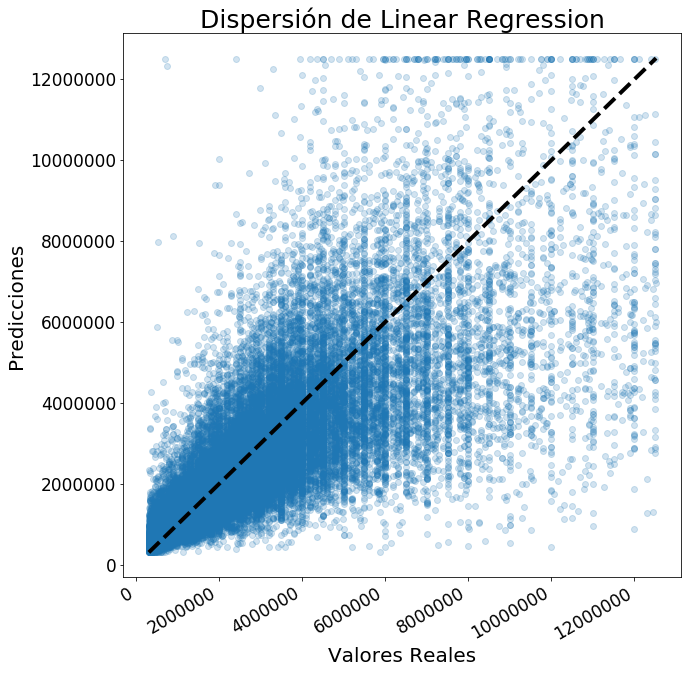

In [82]:
ver_dispersion(y_test, pred, "Linear Regression")

In [ ]:
detenerse

### CORRIDA DE SUBMIT

In [ ]:
%%time
y_l = np.log(y)
reg = #ACA VA EL TRAIN DEL ALGORITMO CORRESPONDIENTE

In [ ]:
%%time 
pred_test = #ACA VA EL TEST DEL ALGORITMO CORRESPONDIENTE
pred_test = np.exp(pred_test)

In [ ]:
ids_test = pd.read_csv(f"{ruta_data}/ids_test.csv")

ids_test["target"] = pred_test

#### Ponele algun nombre al csv

In [ ]:
ids_test.to_csv(f"{ruta_submits}/linear_regression_final.csv",index=False)